In [79]:
import matplotlib.pyplot as plt

plt.rcParams["figure.constrained_layout.use"] = True
plt.rcParams["scatter.edgecolors"] = "black"
plt.rcParams["lines.linewidth"] = 0.25

import seaborn as sns

sns.set()
sns.set_context("notebook")
sns.set_palette("PuBu")

import numpy as np

# EXERCISE 10


In [80]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split


In [81]:
X, y = fetch_olivetti_faces(random_state=36, return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=2, stratify=y, test_size=0.3
)
X_test, X_valid, y_test, y_valid = train_test_split(
    X_test, y_test, random_state=2, stratify=y_test, train_size=0.6
)


In [82]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.98, random_state=25)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_valid_pca = pca.transform(X_valid)

pca.n_components_


162

In [83]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, silhouette_score

k_range = range(5, 250, 5)
kmeans_per_k = [
    KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_train_pca)
    for k in k_range
]

silhouette_scores = [
    silhouette_score(X_train_pca, model.labels_) for model in kmeans_per_k
]


In [84]:
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]


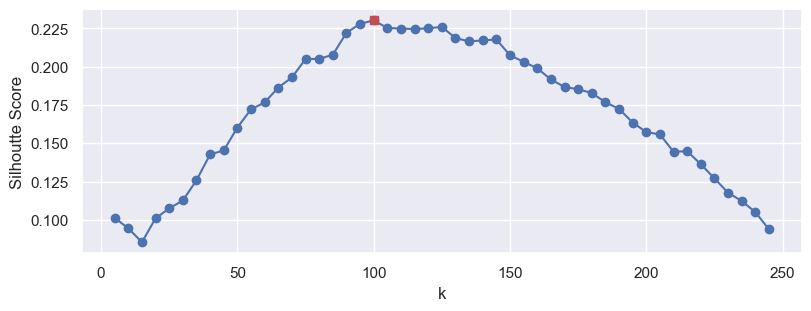

In [85]:
plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.plot(best_k, best_score, "rs")
plt.xlabel("k")
plt.ylabel("Silhoutte Score")
plt.show()

In [86]:
best_k_range = range(best_k - 10, best_k + 10, 1)
best_kmeans_per_k = [
    KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_train_pca)
    for k in best_k_range
]
best_silhouette_scores = [
    silhouette_score(X_train_pca, model.labels_) for model in best_kmeans_per_k
]

best_index = np.argmax(best_silhouette_scores)
best_k = best_k_range[best_index]
best_score = best_silhouette_scores[best_index]


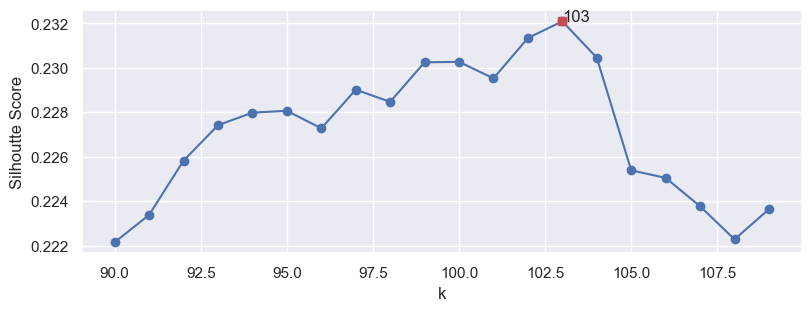

In [87]:
plt.figure(figsize=(8, 3))
plt.plot(best_k_range, best_silhouette_scores, "bo-")
plt.plot(best_k, best_score, "rs")
plt.annotate(best_k, (best_k, best_score))
# plt.xticks(range(95,110))
plt.xlabel("k")
plt.ylabel("Silhoutte Score")
plt.show()

In [88]:
best_modell = best_kmeans_per_k[best_index]
best_modell.fit(X_train)


KMeans(n_clusters=103, n_init='auto', random_state=42)

In [89]:
best_modell.labels_

array([ 62,  53,  92,  84,   3,   3,   7,  62,  79,   9,  47,  68,  27,
        82,  81,   7,  24,  25,  99,  88,  97,  54,   9,  85,  50,  75,
        14, 102,  49,  29,  35,  44,  27,  17,  48,  75,  80,  58,  83,
        13,  53,  18,  23,  42,  47,  22,  33,  63,  88,  44,  36,  70,
        25,  39,  52,  99,  69,  20,  19,  76,   7,  51,  86,  68,  43,
       101,  32,  14,  97,   9,  11,  29,  13,  81,  91,  70,  32,  22,
        37,  88,  52,  51,  20,  41,  43,  33,  63,  35, 101,   2,  12,
        20,  56,  57,  10,   7,   8,  27,  67,  53,  64,  51,   0,  20,
        25,  63,  28,  38,  27,   8,   2,  31,  61,  35,  65,  86,  39,
        12,  21,  97,  97,  26,   6,  64,  70,  60,   1,   3,   5, 100,
        17,  58,  49,   2,  69,  58,  28,  45,  39,  25,  59,  20,  29,
        36,  30,  96,  53,  18,   4, 100,  27,  95,  67,  38,   8,  77,
        15,  88,  98,  66,   5,  99,  20,  68,  91,  15,  33,  42,  92,
        19,   3,  15,  60,   5,  21,  10,  25,  46,  85,  37,  3

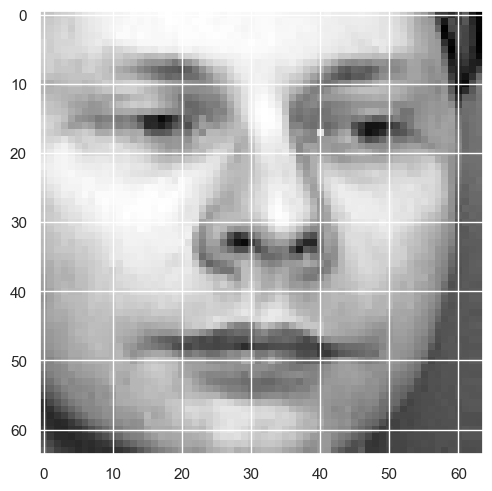

In [90]:
image_shape = (64, 64)
face = X_test[0]
plt.imshow(face.reshape(image_shape), cmap="gray")


/var/folders/37/qm04wzz922lbp9wmkw415w100000gn/T/ipykernel_1648/505629676.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(faces), 2)


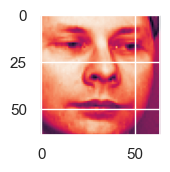

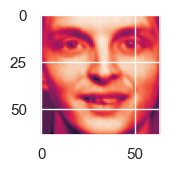

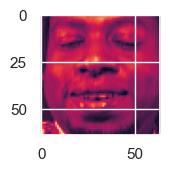

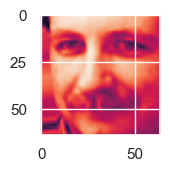

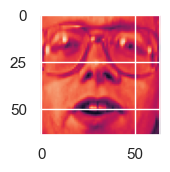

In [91]:
faces = X_test[:5]
faces = faces.reshape(-1, 64, 64)
for face in faces:
    # plt.figure(figsize=(1,1))
    plt.xticks(ticks=[])
    plt.yticks(ticks=[])
    plt.subplot(1, len(faces), 2)
    plt.imshow(face)
    plt.show()


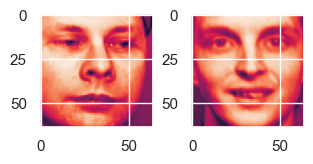

In [92]:
plt.subplot(1, len(faces), 1)
plt.imshow(faces[0])
plt.subplot(1, len(faces), 2)
plt.imshow(faces[1])


In [93]:
def plot_faces(faces, labels):
    n_cols = len(faces)
    # plt.xticks(ticks=[])
    # plt.yticks(ticks=[])
    plt.figure(figsize=(n_cols, 1))

    for index, face in enumerate(faces):
        plt.subplot(1, n_cols, index + 1)
        plt.imshow(faces[index])
        plt.xticks(ticks=[])
        plt.yticks(ticks=[])
        plt.xlabel(labels[index])
    plt.show()


In [94]:
# plot_faces(faces, 22)

In [95]:
l, i = np.unique(best_modell.labels_, return_index=False, return_inverse=True)

Cluster 0


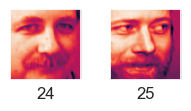

Cluster 1


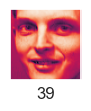

Cluster 2


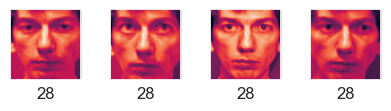

Cluster 3


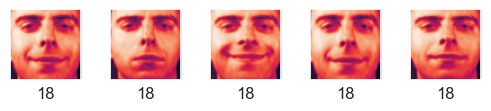

Cluster 4


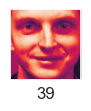

Cluster 5


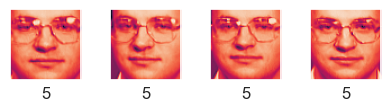

Cluster 6


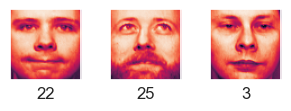

Cluster 7


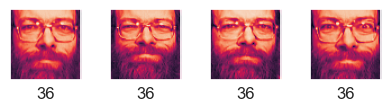

Cluster 8


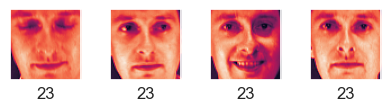

Cluster 9


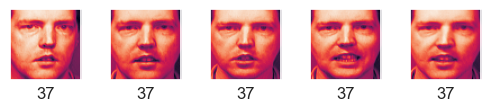

Cluster 10


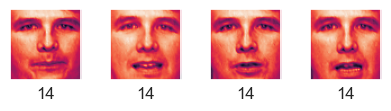

Cluster 11


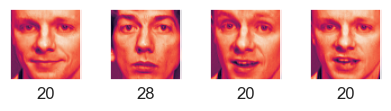

Cluster 12


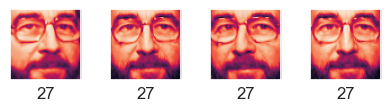

Cluster 13


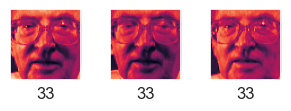

Cluster 14


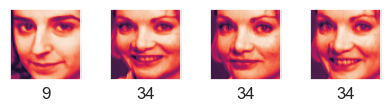

Cluster 15


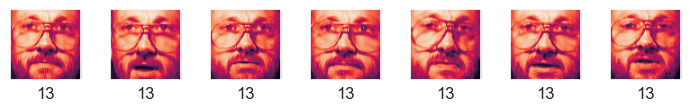

Cluster 16


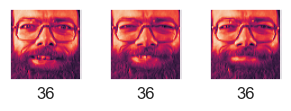

Cluster 17


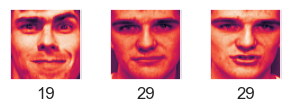

Cluster 18


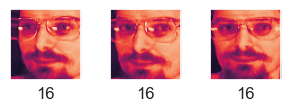

Cluster 19


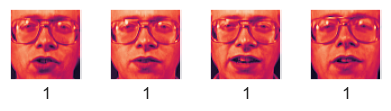

Cluster 20


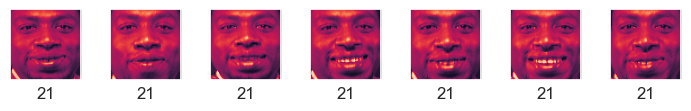

Cluster 21


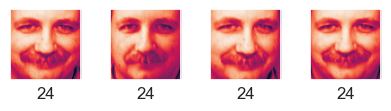

Cluster 22


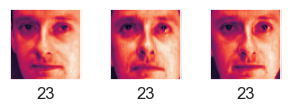

Cluster 23


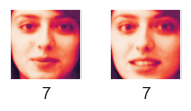

Cluster 24


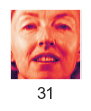

Cluster 25


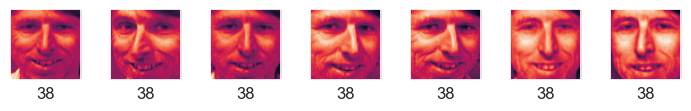

Cluster 26


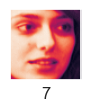

Cluster 27


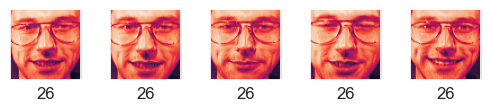

Cluster 28


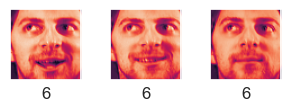

Cluster 29


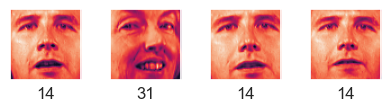

Cluster 30


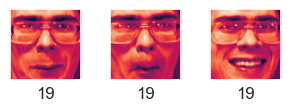

Cluster 31


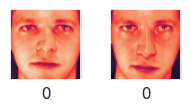

Cluster 32


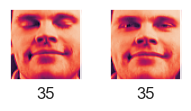

Cluster 33


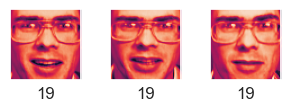

Cluster 34


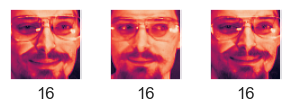

Cluster 35


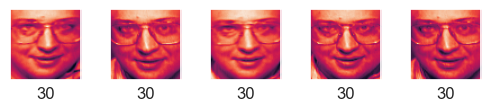

Cluster 36


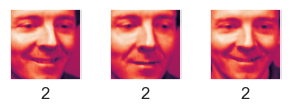

Cluster 37


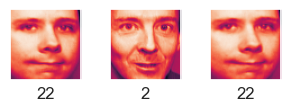

Cluster 38


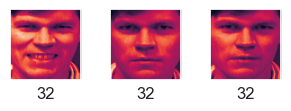

Cluster 39


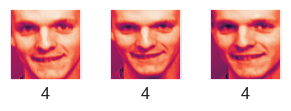

Cluster 40


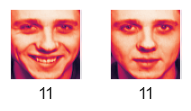

Cluster 41


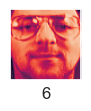

Cluster 42


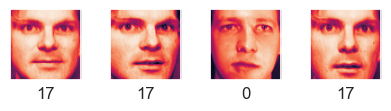

Cluster 43


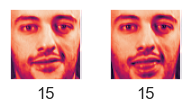

Cluster 44


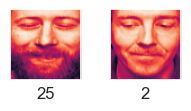

Cluster 45


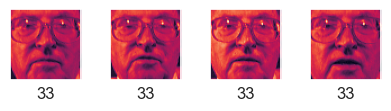

Cluster 46


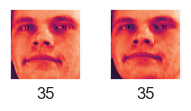

Cluster 47


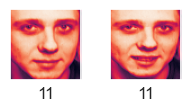

Cluster 48


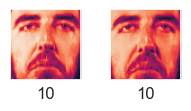

Cluster 49


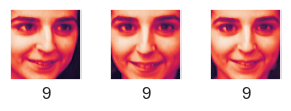

Cluster 50


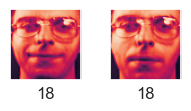

Cluster 51


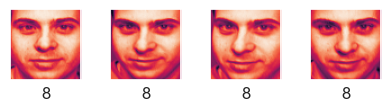

Cluster 52


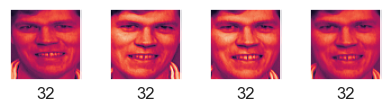

Cluster 53


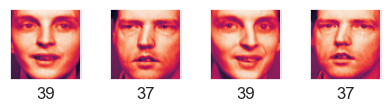

Cluster 54


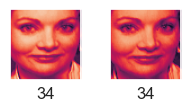

Cluster 55


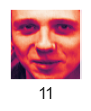

Cluster 56


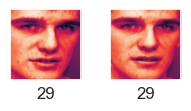

Cluster 57


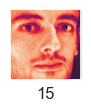

Cluster 58


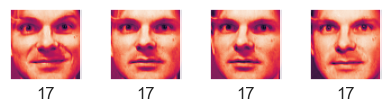

Cluster 59


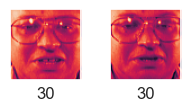

Cluster 60


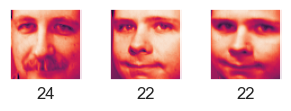

Cluster 61


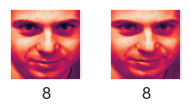

Cluster 62


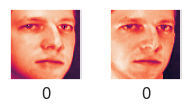

Cluster 63


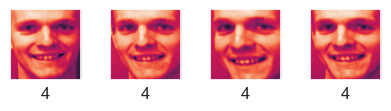

Cluster 64


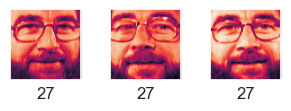

Cluster 65


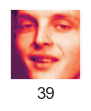

Cluster 66


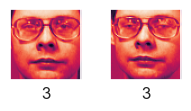

Cluster 67


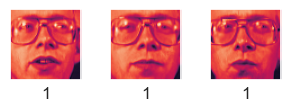

Cluster 68


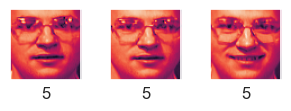

Cluster 69


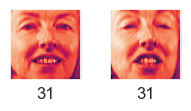

Cluster 70


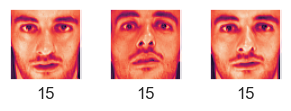

Cluster 71


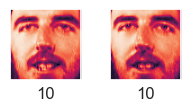

Cluster 72


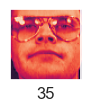

Cluster 73


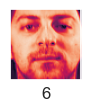

Cluster 74


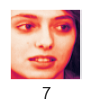

Cluster 75


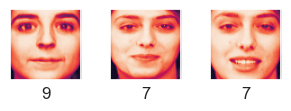

Cluster 76


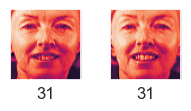

Cluster 77


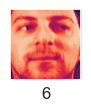

Cluster 78


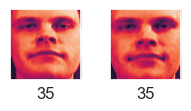

Cluster 79


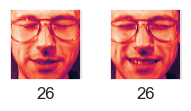

Cluster 80


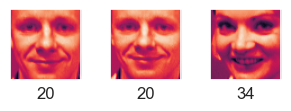

Cluster 81


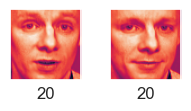

Cluster 82


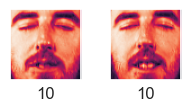

Cluster 83


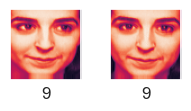

Cluster 84


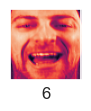

Cluster 85


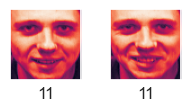

Cluster 86


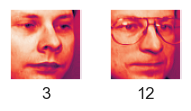

Cluster 87


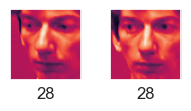

Cluster 88


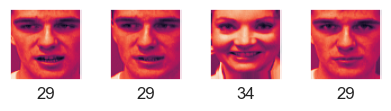

Cluster 89


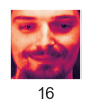

Cluster 90


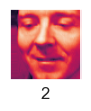

Cluster 91


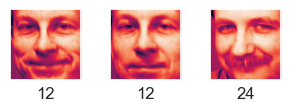

Cluster 92


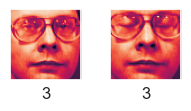

Cluster 93


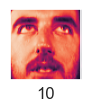

Cluster 94


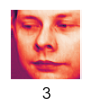

Cluster 95


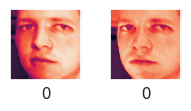

Cluster 96


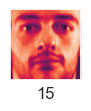

Cluster 97


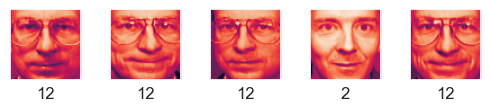

Cluster 98


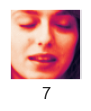

Cluster 99


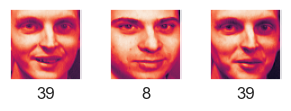

Cluster 100


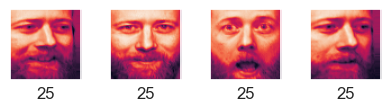

Cluster 101


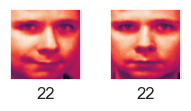

Cluster 102


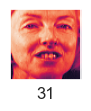

In [96]:
for cluster_id in np.unique(best_modell.labels_):
    print("Cluster".format(cluster_id), cluster_id)
    i = best_modell.labels_ == cluster_id
    faces = X_train[i]
    faces = faces.reshape(-1, 64, 64)
    labels = y_train[i]

    plot_faces(faces, labels=labels)

# EXERCISE 11


train a classifier to predict which person is represented in each picture, and evaluate it on the validation set.


In [97]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


voting_clf = VotingClassifier(
    estimators=[
        (
            "RFC",
            RandomForestClassifier(
                oob_score=True, n_jobs=-1, random_state=25, n_estimators=200
            ),
        ),
        ("SVC", SVC(probability=True, random_state=35)),
        ("DTC", DecisionTreeClassifier(random_state=35)),
        ("SGDC", SGDClassifier(n_jobs=-1, random_state=35, loss="modified_huber")),
    ],
    voting="hard",
    n_jobs=-1,
)

In [98]:
voting_clf.fit(X_train_pca, y_train)


VotingClassifier(estimators=[('RFC',
                              RandomForestClassifier(n_estimators=200,
                                                     n_jobs=-1, oob_score=True,
                                                     random_state=25)),
                             ('SVC', SVC(probability=True, random_state=35)),
                             ('DTC', DecisionTreeClassifier(random_state=35)),
                             ('SGDC',
                              SGDClassifier(loss='modified_huber', n_jobs=-1,
                                            random_state=35))],
                 n_jobs=-1)

In [99]:
voting_clf.classes_


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

In [100]:
voting_clf.score(X_valid_pca, y_valid)

0.9166666666666666

Next, use k-means as a dimensionality reduction tool, and train a classifier on the reduced set.


In [101]:
best_modell


KMeans(n_clusters=103, n_init='auto', random_state=42)

In [102]:
X_train_kmeans = best_modell.fit_transform(X_train_pca)


In [103]:
X_valid_kmeans = best_modell.transform(X_valid_pca)

In [104]:
clf = RandomForestClassifier(
    oob_score=True, n_jobs=-1, random_state=25, n_estimators=200
)
clf.fit(X_train_kmeans, y_train)
clf.score(X_valid_kmeans, y_valid)


0.6875

Search for the number of clusters that allows the classifier to get the best performance: what performance can you reach?


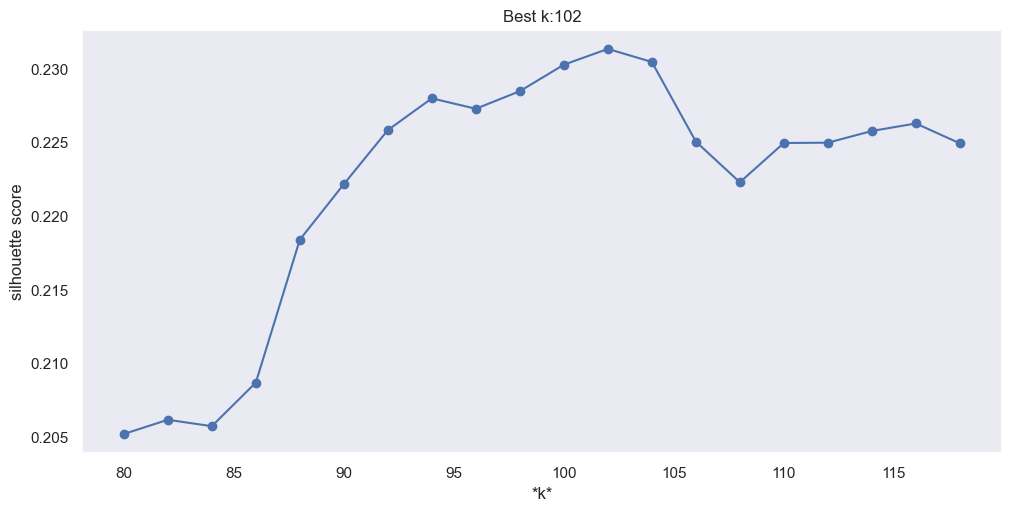

In [105]:
k_range = range(80, 120, 2)
kmeans_per_k = [
    KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_train_pca)
    for k in k_range
]

silhouette_scores = [
    silhouette_score(X_train_pca, model.labels_) for model in kmeans_per_k
]

plt.figure(figsize=(10, 5))
plt.plot(list(k_range), silhouette_scores, "bo-")

plt.xlabel("*k*")
plt.ylabel("silhouette score")
plt.title(f"Best k:{k_range[np.argmax(silhouette_scores)]}")
plt.grid()
plt.show()


In [106]:
best_modell = kmeans_per_k[np.argmax(silhouette_scores)]

X_train_reduced = best_modell.transform(X_train_pca)
X_valid_reduced = best_modell.transform(X_valid_pca)
X_test_reduced = best_modell.transform(X_test_pca)

clf = RandomForestClassifier(
    oob_score=True, n_jobs=-1, random_state=25, n_estimators=200
)
clf.fit(X_train_reduced, y_train)
clf.score(X_valid_reduced, y_valid)

0.7291666666666666

What if you append the features from the reduced set to the original features (again, searching for the best number of clusters)


In [107]:
X_train_extended = np.c_[X_train_pca, X_train_reduced]
X_valid_extended = np.c_[X_valid_pca, X_valid_reduced]
X_test_extended = np.c_[X_test_pca, X_test_reduced]

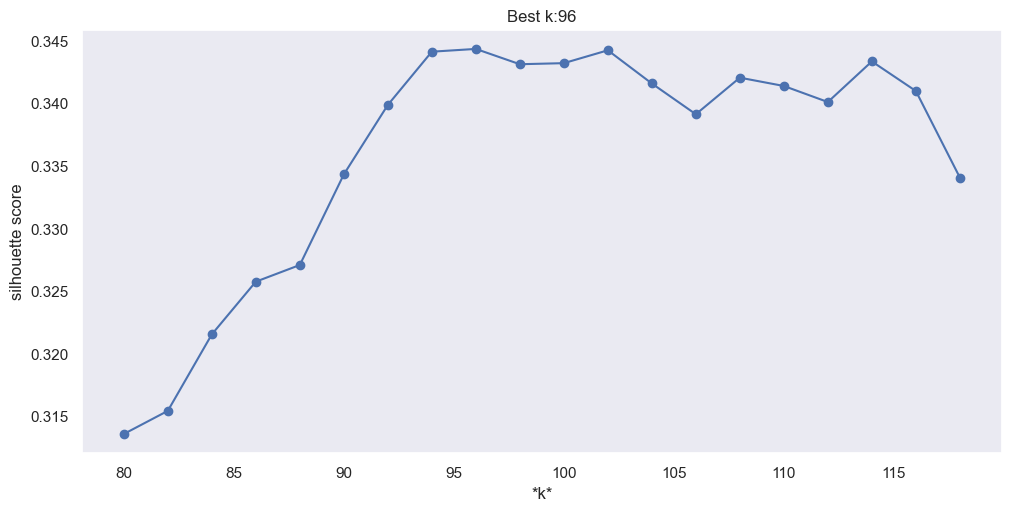

In [108]:
k_range = range(80, 120, 2)
kmeans_per_k = [
    KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_train_reduced)
    for k in k_range
]

silhouette_scores = [
    silhouette_score(X_train_reduced, model.labels_) for model in kmeans_per_k
]

plt.figure(figsize=(10, 5))
plt.plot(list(k_range), silhouette_scores, "bo-")

plt.xlabel("*k*")
plt.ylabel("silhouette score")
plt.title(f"Best k:{k_range[np.argmax(silhouette_scores)]}")
plt.grid()
plt.show()

In [109]:
best_modell = kmeans_per_k[np.argmax(silhouette_scores)]

X_train_extended = np.c_[X_train_pca, X_train_reduced]
X_valid_extended = np.c_[X_valid_pca, X_valid_reduced]
X_test_extended = np.c_[X_test_pca, X_test_reduced]

clf = RandomForestClassifier(
    oob_score=True, n_jobs=-1, random_state=25, n_estimators=200
)
clf.fit(X_train_extended, y_train)
clf.score(X_valid_extended, y_valid)

0.7708333333333334

# EXERCISE 12


Train a Gaussian mixture model on the Olivetti faces dataset. To speed up the algorithm, you should probably reduce the dataset’s dimensionality (e.g., use PCA, preserving 99% of the variance)


In [110]:
X, y = fetch_olivetti_faces(random_state=36, return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=2, stratify=y, test_size=0.3
)
X_test, X_valid, y_test, y_valid = train_test_split(
    X_test, y_test, random_state=2, stratify=y_test, train_size=0.6
)


In [111]:
from sklearn.random_projection import SparseRandomProjection, GaussianRandomProjection
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.metrics import accuracy_score


In [112]:
guassian_rnd_proj = GaussianRandomProjection(random_state=42, eps=0.18)
X_train_SRP = guassian_rnd_proj.fit_transform(X_train)
X_valid_SRP = guassian_rnd_proj.fit_transform(X_valid)

X_train_SRP.shape

(280, 1581)

In [113]:
gmm = GaussianMixture(random_state=5, n_components=40)
# y_pred = gmm.fit_predict(X_train_SRP)
y_pred = gmm.fit_predict(X_train_SRP)
accuracy_score(y_train, y_pred)

0.02857142857142857

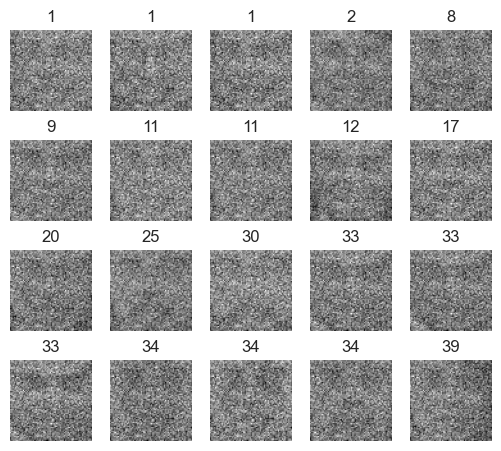

In [114]:
# Sparse Random Projection
X, y = fetch_olivetti_faces(random_state=36, return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=2, stratify=y, test_size=0.3
)
X_test, X_valid, y_test, y_valid = train_test_split(
    X_test, y_test, random_state=2, stratify=y_test, train_size=0.6
)

srp = SparseRandomProjection(random_state=53, eps=0.15, n_components="auto")

X_train_srp = srp.fit_transform(X_train)
X_test_srp = srp.transform(X_test)
X_valid_srp = srp.transform(X_valid)

gm = GaussianMixture(n_components=40, random_state=42)
y_pred = gm.fit_predict(X_train_srp)

n_gen_faces = 20
gen_faces_reduced, y_gen_faces = gm.sample(n_samples=n_gen_faces)
gen_faces = srp.inverse_transform(gen_faces_reduced)


def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()


plot_faces(gen_faces, y_gen_faces)


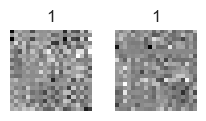

In [115]:
# LLE
X, y = fetch_olivetti_faces(random_state=36, return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=2, stratify=y, test_size=0.3
)
X_test, X_valid, y_test, y_valid = train_test_split(
    X_test, y_test, random_state=2, stratify=y_test, train_size=0.6
)

from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=40, random_state=5, n_jobs=-1, n_neighbors=10)


X_train_lle = lle.fit_transform(X_train)
X_test_lle = lle.transform(X_test)
X_valid_lle = lle.transform(X_valid)

gm = GaussianMixture(n_components=40, random_state=42)
y_pred = gm.fit_predict(X_train_lle)

n_gen_faces = 20
gen_faces_reduced, y_gen_faces = gm.sample(n_samples=n_gen_faces)


def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 20, 20)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()


# Reshape gen_faces_reduced
# gen_faces_reduced = gen_faces_reduced.reshape(-1, 64, 64)
# Plot the faces
plot_faces(gen_faces_reduced, y_gen_faces)


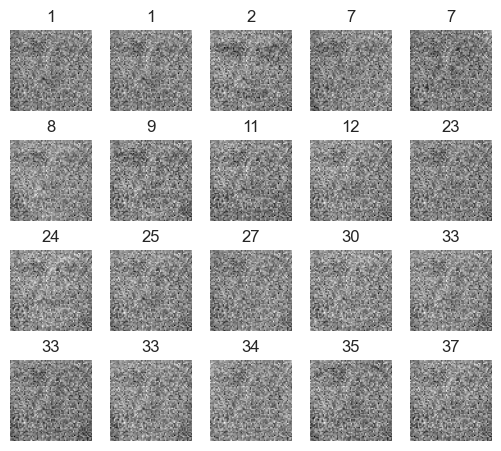

In [116]:
# Gaussian Random Projection
X, y = fetch_olivetti_faces(random_state=36, return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=2, stratify=y, test_size=0.3
)
X_test, X_valid, y_test, y_valid = train_test_split(
    X_test, y_test, random_state=2, stratify=y_test, train_size=0.6
)

grp = GaussianRandomProjection(n_components="auto", random_state=24, eps=0.18)

X_train_grp = grp.fit_transform(X_train)
X_test_grp = grp.transform(X_test)
X_valid_grp = grp.transform(X_valid)

gm = GaussianMixture(n_components=40, random_state=42)
y_pred = gm.fit_predict(X_train_grp)

n_gen_faces = 20
gen_faces_reduced, y_gen_faces = gm.sample(n_samples=n_gen_faces)
gen_faces = grp.inverse_transform(gen_faces_reduced)


def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()


plot_faces(gen_faces, y_gen_faces)

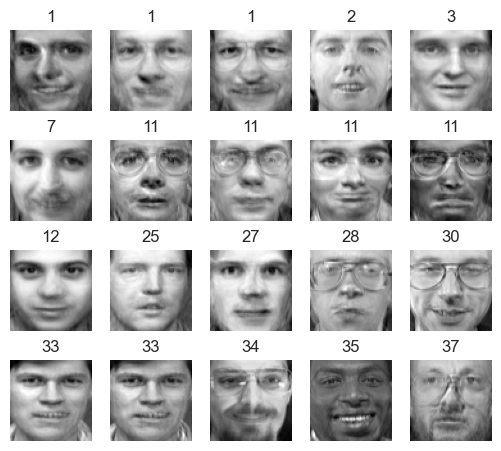

In [117]:
# PCA
X, y = fetch_olivetti_faces(random_state=36, return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=2, stratify=y, test_size=0.3
)
X_test, X_valid, y_test, y_valid = train_test_split(
    X_test, y_test, random_state=2, stratify=y_test, train_size=0.6
)

from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

pca = PCA(n_components=0.98, random_state=25)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_valid_pca = pca.transform(X_valid)


gm = GaussianMixture(n_components=40, random_state=42)
y_pred = gm.fit_predict(X_train_pca)

n_gen_faces = 20
gen_faces_reduced, y_gen_faces = gm.sample(n_samples=n_gen_faces)
gen_faces = pca.inverse_transform(gen_faces_reduced)


def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()


plot_faces(gen_faces, y_gen_faces)

# EXERCISE 13


take the Olivetti faces dataset and reduce it with PCA, preserving 99% of the variance

In [118]:
X, y = fetch_olivetti_faces(random_state=36, return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=2, stratify=y, test_size=0.3
)
X_test, X_valid, y_test, y_valid = train_test_split(
    X_test, y_test, random_state=2, stratify=y_test, train_size=0.6
)

from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

pca = PCA(n_components=0.98, random_state=25)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_valid_pca = pca.transform(X_valid)


Then compute the reconstruction error for each image.

In [121]:
def reconstruction_error(pca, X):
    X_pca = pca.transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)
    mse = np.square(X_reconstructed - X).mean(axis=1)
    return mse.mean()


In [122]:
reconstruction_error(pca, X_train)

0.0003824836

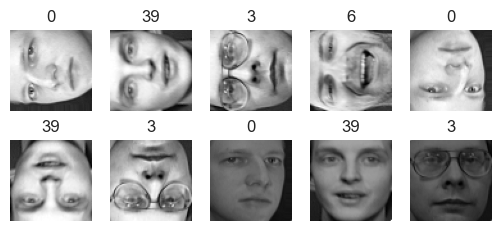

In [123]:
n_rotated = 4
rotated = np.transpose(X_train[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64 * 64)
y_rotated = y_train[:n_rotated]

n_flipped = 3
flipped = X_train[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64 * 64)
y_flipped = y_train[:n_flipped]

n_darkened = 3
darkened = X_train[:n_darkened].copy()
darkened[:, 1:-1] *= 0.3
y_darkened = y_train[:n_darkened]

X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(X_bad_faces, y_bad)

In [124]:
reconstruction_error(pca, X_bad_faces)


0.0061886027

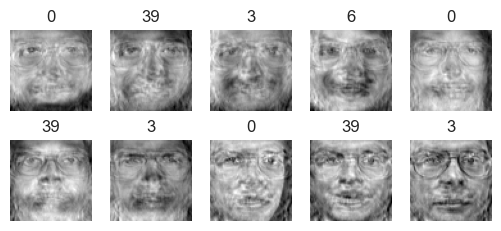

In [125]:
X_bad_faces_pca = pca.transform(X_bad_faces)
X_bad_faces_reconstructed = pca.inverse_transform(X_bad_faces_pca)
plot_faces(X_bad_faces_reconstructed, y_bad)